In [1]:
#import dependencies
import os
import requests
import json 
from dotenv import load_dotenv
load_dotenv()
from binance.client import Client

#api keys
API_KEY = os.getenv("BINANCE_API_KEY")

API_SECRET = os.getenv("BINANCE_SECRET_KEY")
#create api object
client = Client(API_KEY,API_SECRET, tld='us')

In [2]:
#get eth daily candle from 2016-2022
candles = client.get_historical_klines("ETHUSDT", Client.KLINE_INTERVAL_1DAY, "1 Dec, 2016", "1 Dec, 2022")

In [3]:
#set list to hold candle data
open = []
high = []
low = []
close = []
volume = []
time=[]

In [4]:
candles

[[1569196800000,
  '209.55000000',
  '209.55000000',
  '209.55000000',
  '209.55000000',
  '0.01000000',
  1569283199999,
  '2.09550000',
  1,
  '0.00000000',
  '0.00000000',
  '0'],
 [1569283200000,
  '195.50000000',
  '195.50000000',
  '152.56000000',
  '167.09000000',
  '2224.36708000',
  1569369599999,
  '372216.57672210',
  1162,
  '999.08192000',
  '167999.08871190',
  '0'],
 [1569369600000,
  '166.84000000',
  '174.15000000',
  '163.18000000',
  '170.00000000',
  '181.60286000',
  1569455999999,
  '30484.99490570',
  245,
  '91.52286000',
  '15340.04559900',
  '0'],
 [1569456000000,
  '169.95000000',
  '170.77000000',
  '153.07000000',
  '166.69000000',
  '545.45350000',
  1569542399999,
  '90698.28420630',
  462,
  '310.10175000',
  '51803.02561300',
  '0'],
 [1569542400000,
  '166.34000000',
  '175.54000000',
  '161.44000000',
  '173.69000000',
  '630.91688000',
  1569628799999,
  '105790.28902980',
  580,
  '301.33343000',
  '50521.59216750',
  '0'],
 [1569628800000,
  '174.1

In [5]:
#for loop that adds data to lists above
for i in range(len(candles)):
    open.append(candles[i][1])
    high.append(candles[i][2])
    low.append(candles[i][3])
    close.append(candles[i][4])
    volume.append(candles[i][5])
    time.append(candles[i][6])

In [6]:
import pandas as pd

candle_df_open = pd.DataFrame(open, columns= ['open'])
candle_df_high = pd.DataFrame(high, columns= ['high'])
candle_df_low = pd.DataFrame(low, columns= ['low'])
candle_df_close = pd.DataFrame(close, columns= ['close'])
candle_df_volume = pd.DataFrame(volume, columns= ['volume'])
candle_df_time = pd.DataFrame(time, columns= ['time'])

In [7]:
candle_df = pd.concat([candle_df_open,candle_df_high,candle_df_low,candle_df_close,candle_df_volume, candle_df_time], axis =1)

In [8]:
candle_df.head()

,open,high,low,close,volume,time
0,209.55000000,209.55000000,209.55000000,209.55000000,0.01000000,1569283199999
1,195.50000000,195.50000000,152.56000000,167.09000000,2224.36708000,1569369599999
2,166.84000000,174.15000000,163.18000000,170.00000000,181.60286000,1569455999999
3,169.95000000,170.77000000,153.07000000,166.69000000,545.45350000,1569542399999
4,166.34000000,175.54000000,161.44000000,173.69000000,630.91688000,1569628799999


In [9]:
candle_df['time'] = pd.to_datetime(candle_df['time'], unit='ms')

candle_df['time']

0      2019-09-23 23:59:59.999
1      2019-09-24 23:59:59.999
2      2019-09-25 23:59:59.999
3      2019-09-26 23:59:59.999
4      2019-09-27 23:59:59.999
                 ...          
1161   2022-11-27 23:59:59.999
1162   2022-11-28 23:59:59.999
1163   2022-11-29 23:59:59.999
1164   2022-11-30 23:59:59.999
1165   2022-12-01 23:59:59.999
Name: time, Length: 1166, dtype: datetime64[ns]

In [10]:
candle_df = candle_df.set_index('time')


In [11]:
candle_df.head()

,open,high,low,close,volume
time,,,,,
2019-09-23 23:59:59.999,209.55000000,209.55000000,209.55000000,209.55000000,0.01000000
2019-09-24 23:59:59.999,195.50000000,195.50000000,152.56000000,167.09000000,2224.36708000
2019-09-25 23:59:59.999,166.84000000,174.15000000,163.18000000,170.00000000,181.60286000
2019-09-26 23:59:59.999,169.95000000,170.77000000,153.07000000,166.69000000,545.45350000
2019-09-27 23:59:59.999,166.34000000,175.54000000,161.44000000,173.69000000,630.91688000


In [12]:
candle_df.to_csv('C:/Users/Justin/Rutgers/project-2/Resources/eth.csv')

In [13]:
candle_df = candle_df.astype('float')

In [14]:
signals_df = candle_df.loc[:,['close']]

signals_df['actual returns'] = signals_df['close'].pct_change()

signals_df = signals_df.dropna()

display(signals_df.head())
display(signals_df.tail())

,close,actual returns
time,,
2019-09-24 23:59:59.999,167.09,-0.202625
2019-09-25 23:59:59.999,170.00,0.017416
2019-09-26 23:59:59.999,166.69,-0.019471
2019-09-27 23:59:59.999,173.69,0.041994
2019-09-28 23:59:59.999,172.84,-0.004894


,close,actual returns
time,,
2022-11-27 23:59:59.999,1193.83,-0.009204
2022-11-28 23:59:59.999,1168.13,-0.021527
2022-11-29 23:59:59.999,1216.37,0.041297
2022-11-30 23:59:59.999,1293.60,0.063492
2022-12-01 23:59:59.999,1276.50,-0.013219


In [15]:
from finta import TA

In [39]:
signals_df['RSI'] = TA.AO(candle_df)
#signals_df['STOCH'] = TA.BBWIDTH(candle_df)

In [42]:
signals_df.head(70)

,close,actual returns,RSI,Signal,Strategy Returns
time,,,,,
2019-09-24 23:59:59.999,167.09,-0.202625,NaN,1,NaN
2019-09-25 23:59:59.999,170.00,0.017416,NaN,1,0.017416
2019-09-26 23:59:59.999,166.69,-0.019471,NaN,1,-0.019471
2019-09-27 23:59:59.999,173.69,0.041994,NaN,1,0.041994
2019-09-28 23:59:59.999,172.84,-0.004894,NaN,1,-0.004894
...,...,...,...,...,...
2019-11-28 23:59:59.999,150.72,-0.012514,-29.276412,0,-0.000000
2019-11-29 23:59:59.999,154.28,0.023620,-26.755735,0,0.000000
2019-11-30 23:59:59.999,151.55,-0.017695,-23.664382,0,-0.000000


In [49]:
# Initialize the new Signal column
signals_df['Signal'] = 0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
signals_df.loc[(signals_df['RSI'] > 0), 'Signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
signals_df.loc[(signals_df['RSI'] < 0) , 'Signal'] = -1

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
#signals_df.loc[(signals_df['RSI'] <= 35) & (signals_df['STOCH'] < .25 ), 'Signal'] = 1
# When Actual Returns are less than 0, generate signal to sell stock short
#ignals_df.loc[(signals_df['RSI'] >= 60) & (signals_df['STOCH'] < .25 ), 'Signal'] = -1

,close,actual returns,RSI,Signal,Strategy Returns
time,,,,,
2019-09-24 23:59:59.999,167.09,-0.202625,NaN,0,NaN
2019-09-25 23:59:59.999,170.00,0.017416,NaN,0,0.0
2019-09-26 23:59:59.999,166.69,-0.019471,NaN,0,-0.0
2019-09-27 23:59:59.999,173.69,0.041994,NaN,0,0.0
2019-09-28 23:59:59.999,172.84,-0.004894,NaN,0,-0.0


,close,actual returns,RSI,Signal,Strategy Returns
time,,,,,
2022-11-27 23:59:59.999,1193.83,-0.009204,-168.887294,-1,-0.009204
2022-11-28 23:59:59.999,1168.13,-0.021527,-158.246000,-1,-0.021527
2022-11-29 23:59:59.999,1216.37,0.041297,-149.849882,-1,0.041297
2022-11-30 23:59:59.999,1293.60,0.063492,-127.099618,-1,0.063492
2022-12-01 23:59:59.999,1276.50,-0.013219,-106.833353,-1,-0.013219


In [50]:
display(signals_df.head())
display(signals_df.tail())

,close,actual returns,RSI,Signal,Strategy Returns
time,,,,,
2019-09-24 23:59:59.999,167.09,-0.202625,NaN,0,NaN
2019-09-25 23:59:59.999,170.00,0.017416,NaN,0,0.0
2019-09-26 23:59:59.999,166.69,-0.019471,NaN,0,-0.0
2019-09-27 23:59:59.999,173.69,0.041994,NaN,0,0.0
2019-09-28 23:59:59.999,172.84,-0.004894,NaN,0,-0.0


,close,actual returns,RSI,Signal,Strategy Returns
time,,,,,
2022-11-27 23:59:59.999,1193.83,-0.009204,-168.887294,-1,-0.009204
2022-11-28 23:59:59.999,1168.13,-0.021527,-158.246000,-1,-0.021527
2022-11-29 23:59:59.999,1216.37,0.041297,-149.849882,-1,0.041297
2022-11-30 23:59:59.999,1293.60,0.063492,-127.099618,-1,0.063492
2022-12-01 23:59:59.999,1276.50,-0.013219,-106.833353,-1,-0.013219


In [51]:
signals_df['Signal'].value_counts()

 1    623
-1    510
 0     32
Name: Signal, dtype: int64

In [52]:
signals_df['Strategy Returns'] = signals_df['actual returns'] * signals_df['Signal'].shift().dropna()

In [53]:
display(signals_df.head())
display(signals_df.tail())

,close,actual returns,RSI,Signal,Strategy Returns
time,,,,,
2019-09-24 23:59:59.999,167.09,-0.202625,NaN,0,NaN
2019-09-25 23:59:59.999,170.00,0.017416,NaN,0,0.0
2019-09-26 23:59:59.999,166.69,-0.019471,NaN,0,-0.0
2019-09-27 23:59:59.999,173.69,0.041994,NaN,0,0.0
2019-09-28 23:59:59.999,172.84,-0.004894,NaN,0,-0.0


,close,actual returns,RSI,Signal,Strategy Returns
time,,,,,
2022-11-27 23:59:59.999,1193.83,-0.009204,-168.887294,-1,0.009204
2022-11-28 23:59:59.999,1168.13,-0.021527,-158.246000,-1,0.021527
2022-11-29 23:59:59.999,1216.37,0.041297,-149.849882,-1,-0.041297
2022-11-30 23:59:59.999,1293.60,0.063492,-127.099618,-1,-0.063492
2022-12-01 23:59:59.999,1276.50,-0.013219,-106.833353,-1,0.013219


<AxesSubplot:xlabel='time'>

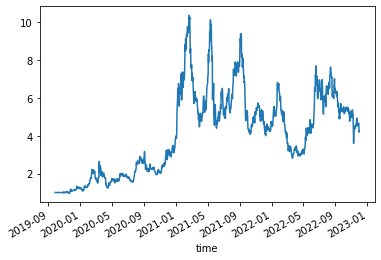

In [54]:
(1 + signals_df['Strategy Returns']).cumprod().plot()

In [55]:
X = signals_df[['RSI']].shift().dropna()

y = signals_df['Signal']

# Review the value counts
y.value_counts()

 1    623
-1    510
 0     32
Name: Signal, dtype: int64

In [56]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2019-10-27 23:59:59.999000


In [57]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report

In [58]:
training_end = X.index.min() + DateOffset(months=12)

# Display the training end date
print(training_end)

2020-10-27 23:59:59.999000


In [59]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Review the X_train DataFrame
X_train.head()

,RSI
time,
2019-10-27 23:59:59.999,-5.545735
2019-10-28 23:59:59.999,-2.792618
2019-10-29 23:59:59.999,1.387824
2019-10-30 23:59:59.999,6.068676
2019-10-31 23:59:59.999,7.756059


In [60]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end+DateOffset(months=6):]
y_test = y.loc[training_end+DateOffset(months=6):]

# Review the X_test DataFrame
X_train.head()

,RSI
time,
2019-10-27 23:59:59.999,-5.545735
2019-10-28 23:59:59.999,-2.792618
2019-10-29 23:59:59.999,1.387824
2019-10-30 23:59:59.999,6.068676
2019-10-31 23:59:59.999,7.756059


In [61]:
# Scale the features DataFrames

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [62]:
# From SVM, instantiate SVC classifier model instance
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
 
# Fit the model to the data using the training data
lr_model = lr_model.fit(X_train_scaled,y_train)
 
# Use the testing data to make the model predictions
lr_pred = lr_model.predict(X_test_scaled)

# Review the model's predicted values
lr_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1, -1, -1, -1, -1

In [63]:
lr_testing_report = classification_report(y_test, lr_pred)

# Print the classification report
print(lr_testing_report)

              precision    recall  f1-score   support

          -1       0.97      0.96      0.97       358
           1       0.94      0.96      0.95       226

    accuracy                           0.96       584
   macro avg       0.96      0.96      0.96       584
weighted avg       0.96      0.96      0.96       584



In [64]:
# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
predictions_df['Predicted'] = lr_pred

# Add the actual returns to the DataFrame
predictions_df['actual returns'] = signals_df['actual returns']

# Add the strategy returns to the DataFrame
predictions_df['Trading Algo Returns'] = signals_df['actual returns'] * predictions_df['Predicted'].shift()

# Review the DataFrame
display(predictions_df.head())
display(predictions_df.tail())

,Predicted,actual returns,Trading Algo Returns
time,,,
2021-04-27 23:59:59.999,1,0.052279,NaN
2021-04-28 23:59:59.999,1,0.030482,0.030482
2021-04-29 23:59:59.999,1,0.003662,0.003662
2021-04-30 23:59:59.999,1,0.005962,0.005962
2021-05-01 23:59:59.999,1,0.061800,0.061800


,Predicted,actual returns,Trading Algo Returns
time,,,
2022-11-27 23:59:59.999,-1,-0.009204,0.009204
2022-11-28 23:59:59.999,-1,-0.021527,0.021527
2022-11-29 23:59:59.999,-1,0.041297,-0.041297
2022-11-30 23:59:59.999,-1,0.063492,-0.063492
2022-12-01 23:59:59.999,-1,-0.013219,0.013219


<AxesSubplot:xlabel='time'>

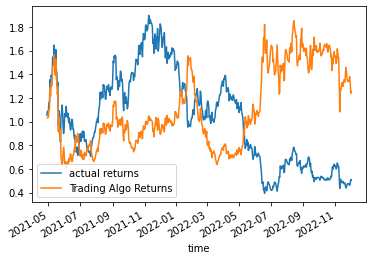

In [65]:
(1 + predictions_df[["actual returns", "Trading Algo Returns"]]).cumprod().plot()

In [34]:
tbill_df = pd.read_csv('C:/Users/Justin/Rutgers/project-2/Resources/DGS2 (2).csv')

In [35]:
tbill_df = tbill_df.set_index('DATE')


In [36]:
new_signals_df = pd.concat([candle_df,tbill_df])
asd



In [44]:
candle_df

,open,high,low,close,volume
time,,,,,
2019-09-23 23:59:59.999,209.55,209.55,209.55,209.55,0.01000
2019-09-24 23:59:59.999,195.50,195.50,152.56,167.09,2224.36708
2019-09-25 23:59:59.999,166.84,174.15,163.18,170.00,181.60286
2019-09-26 23:59:59.999,169.95,170.77,153.07,166.69,545.45350
2019-09-27 23:59:59.999,166.34,175.54,161.44,173.69,630.91688
...,...,...,...,...,...
2022-11-27 23:59:59.999,1205.19,1223.05,1189.13,1193.83,654.26480
2022-11-28 23:59:59.999,1194.92,1198.52,1151.39,1168.13,1260.68583
2022-11-29 23:59:59.999,1167.25,1225.00,1158.51,1216.37,1504.19549


In [39]:
tbill_df

,DGS2
DATE,
2019-09-23,1.68
2019-09-24,1.60
2019-09-25,1.68
2019-09-26,1.66
2019-09-27,1.63
...,...
2022-11-25,4.42
2022-11-28,4.46
2022-11-29,4.48
